d:\Users\epiph\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 1
[LightGBM] [Info] Start training from score 24.446040
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


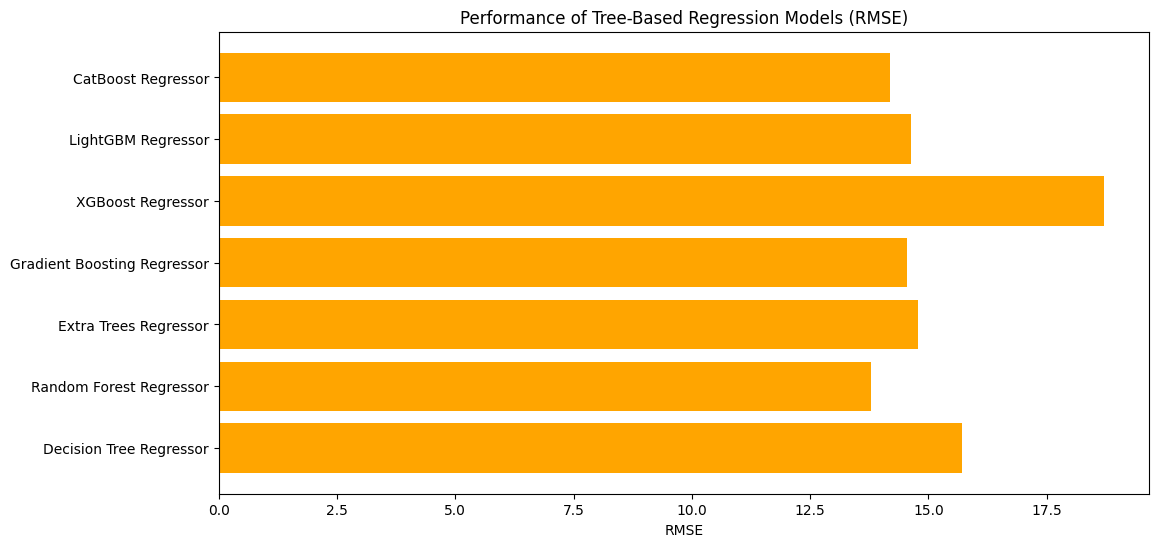

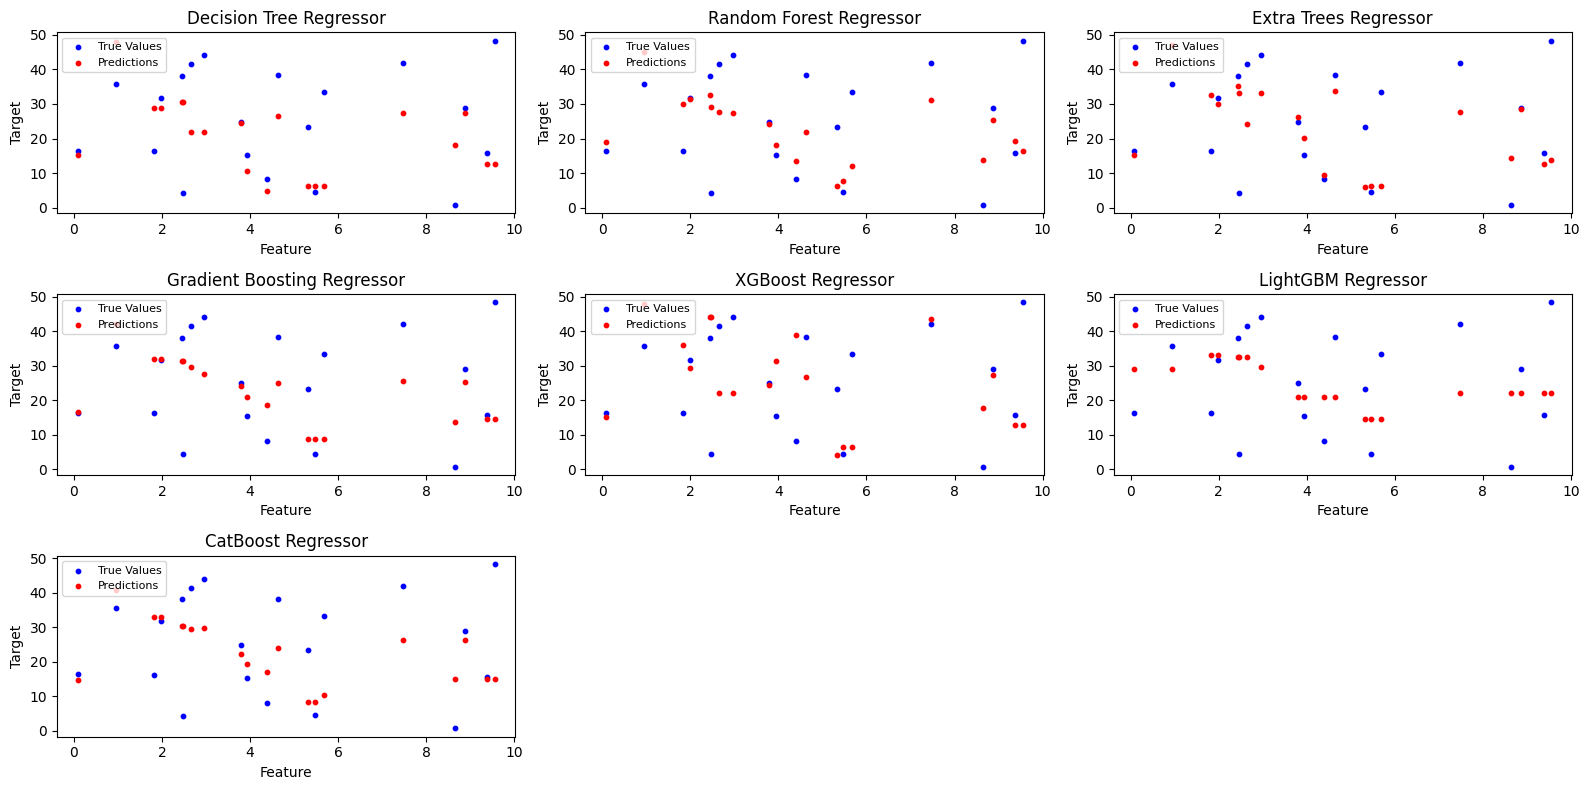

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Generate synthetic dataset
X, y = np.random.rand(100, 1) * 10, np.random.rand(100) * 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define tree-based models
models_tree = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "LightGBM Regressor": LGBMRegressor(random_state=42),
    "CatBoost Regressor": CatBoostRegressor(random_state=42, verbose=0),
}

# Train, predict, and evaluate models
results_tree = {}
predictions_tree = {}
for name, model in models_tree.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results_tree[name] = rmse
    predictions_tree[name] = y_pred

# Visualize RMSE
plt.figure(figsize=(12, 6))
plt.barh(list(results_tree.keys()), list(results_tree.values()), color='orange')
plt.xlabel("RMSE")
plt.title("Performance of Tree-Based Regression Models (RMSE)")
plt.show()

# Visualize Predictions vs. True Values
plt.figure(figsize=(16, 8))
for i, (name, y_pred) in enumerate(predictions_tree.items()):
    plt.subplot(3, 3, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', s=10)
    plt.scatter(X_test, y_pred, color='red', label='Predictions', s=10)
    plt.title(name)
    plt.legend(loc="upper left", fontsize=8)
    plt.xlabel("Feature")
    plt.ylabel("Target")

plt.tight_layout()
plt.show()

树回归模型 (Tree-Based Regression Models) 是基于决策树的回归算法，利用树结构对数据空间进行划分，从而进行连续值的预测。以下是树回归模型的主要分类和常见模型：

---

### **树回归模型分类**

#### **1. 决策树回归模型**
- **Decision Tree Regressor**
  - **实现库**: Scikit-learn 提供
  - **特点**:
    - 基于树结构进行回归任务。
    - 每次分裂数据以最小化某种误差（如均方误差）。
  - **适用场景**:
    - 关系复杂且难以用线性模型拟合的数据。
  - **优缺点**:
    - **优点**: 简单易用，结果可解释。
    - **缺点**: 易过拟合，对噪声敏感。

#### **2. 随机森林回归模型**
- **Random Forest Regressor**
  - **实现库**: Scikit-learn 提供
  - **特点**:
    - 集成多棵决策树，使用 Bagging 技术。
    - 输出是所有树的平均预测结果。
  - **适用场景**:
    - 需要强大的泛化能力，避免过拟合的场景。
  - **优缺点**:
    - **优点**: 减少过拟合，性能稳定。
    - **缺点**: 模型较大，训练和预测时间较长。

#### **3. 极端随机树回归模型**
- **Extra Trees Regressor**
  - **实现库**: Scikit-learn 提供
  - **特点**:
    - 类似于随机森林，但分裂点选择更加随机。
  - **适用场景**:
    - 数据特征之间高度相关时，能提供更好的泛化能力。
  - **优缺点**:
    - **优点**: 减少过拟合，更加高效。
    - **缺点**: 与随机森林相比，可能对参数更加敏感。

#### **4. 梯度提升回归模型**
- **Gradient Boosting Regressor**
  - **实现库**: Scikit-learn 提供
  - **特点**:
    - 通过逐步优化残差的方式构建树。
    - 每棵树拟合前面所有树的误差。
  - **适用场景**:
    - 对预测精度要求高的任务。
  - **优缺点**:
    - **优点**: 高精度，可调节损失函数。
    - **缺点**: 对参数较敏感，训练时间较长。

#### **5. XGBoost 回归模型**
- **XGBoost Regressor**
  - **实现库**: XGBoost 提供
  - **特点**:
    - 基于梯度提升框架，进行额外优化（如分布式计算）。
  - **适用场景**:
    - 需要快速高效训练的场景。
  - **优缺点**:
    - **优点**: 高效、支持并行计算。
    - **缺点**: 对参数调节要求较高。

#### **6. LightGBM 回归模型**
- **LightGBM Regressor**
  - **实现库**: LightGBM 提供
  - **特点**:
    - 采用直方算法优化梯度提升。
  - **适用场景**:
    - 大规模数据集，特征数量较多的场景。
  - **优缺点**:
    - **优点**: 高效，内存占用小。
    - **缺点**: 对数据排序要求较高。

#### **7. CatBoost 回归模型**
- **CatBoost Regressor**
  - **实现库**: CatBoost 提供
  - **特点**:
    - 对类别型数据处理更加高效。
  - **适用场景**:
    - 包含大量类别型特征的数据。
  - **优缺点**:
    - **优点**: 自动处理类别特征，减少预处理工作。
    - **缺点**: 训练速度稍慢于 LightGBM。

---


### **模型选型建议**

| **任务特点**                | **推荐模型**                                                               |
|-----------------------------|---------------------------------------------------------------------------|
| 简单任务                   | Decision Tree Regressor                                                  |
| 数据噪声较大               | Random Forest Regressor, Extra Trees Regressor                           |
| 高精度需求                 | Gradient Boosting Regressor, XGBoost Regressor                          |
| 大规模数据集               | LightGBM Regressor                                                      |
| 包含大量类别特征           | CatBoost Regressor                                                      |

如果需要进一步优化或扩展实现，请随时告诉我！